# Facility Location Problem (FLP)

## 1. Definindo o Contexto
Imagine que estamos gerenciando uma empresa de e-commerce que quer melhorar a eficiência de entrega abrindo novos centros de distribuição em uma cidade. O objetivo é atender à demanda de 20 clientes, espalhados pela cidade, com 4 possíveis localizações para os centros de distribuição. Cada centro tem um custo fixo de instalação e uma capacidade máxima de atendimento.

## 2. Objetivo do Problema
Minimizar o custo total da operação, composto por:
   - **Custo Fixo**: Custo para construir e operar um centro de distribuição em uma determinada localização.
   - **Custo de Transporte**: Custo para transportar mercadorias do centro de distribuição para os clientes, baseado na distância entre eles.

## 3. Entradas do Problema
   - **Localizações candidatas**: Existem quatro localizações possíveis onde podemos instalar centros de distribuição. Cada uma tem um custo fixo e uma capacidade máxima:
     - Localização A: Custo Fixo = 50, Capacidade = 189
     - Localização B: Custo Fixo = 40, Capacidade = 159
     - Localização C: Custo Fixo = 70, Capacidade = 159
     - Localização D: Custo Fixo = 60, Capacidade = 129
   - **Demanda dos clientes**: Temos 20 clientes, cada um com uma demanda específica de mercadorias.
   - **Distâncias**: A distância entre cada cliente e cada localização candidata de centro de distribuição, que define o custo de transporte.

## 4. Variáveis de Decisão
   - $ x_i $: Variável binária que indica se um centro de distribuição $ i $ será aberto (1 se aberto, 0 se fechado).
   - $ y_{ij} $: Quantidade de mercadorias transportadas do centro $ i $ para o cliente $ j $.

## 5. Função Objetivo
Queremos minimizar o custo total, que é a soma dos custos fixos de instalação e dos custos de transporte:

$$
\text{Minimizar} \quad \sum_{i} F_i x_i + \sum_{i}\sum_{j} C_{ij} y_{ij}
$$

Onde:
   - $ F_i $ é o custo fixo de instalar o centro $ i $.
   - $ C_{ij} $ é o custo de transporte entre o centro $ i $ e o cliente $ j $, baseado na distância.

## 6. Restrições
1. **Cobertura de demanda**: Toda a demanda dos clientes deve ser atendida:

$$
\sum_{i} y_{ij} \geq D_j \quad \forall j
$$

Onde $ D_j $ é a demanda do cliente $ j $.

2. **Capacidade dos centros**: A quantidade total de mercadorias enviada de um centro $ i $ para todos os clientes $ j $ não pode exceder a capacidade $ K_i $ do centro $ i $:

$$
\sum_{j} y_{ij} \leq K_i x_i \quad \forall i
$$

3. **Variáveis binárias**: $ x_i $ deve ser 0 ou 1, indicando se um centro é aberto ou não.

## 7. Ferramentas e Solução
Este problema pode ser resolvido usando diferentes ferramentas de otimização, como **PuLP** ou **OR-Tools** em Python, que permitem formular e resolver problemas de programação linear inteira.

## 8. Exemplo Concreto
A empresa deseja abrir um número mínimo de centros de distribuição para cobrir a demanda total de 20 clientes. Com as capacidades ajustadas para cada localização, vamos usar a otimização para escolher quais centros abrir e como alocar a demanda dos clientes entre eles, minimizando o custo total.

In [1]:
import pandas as pd
import pulp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dmd = pd.read_csv('demands_data.csv')

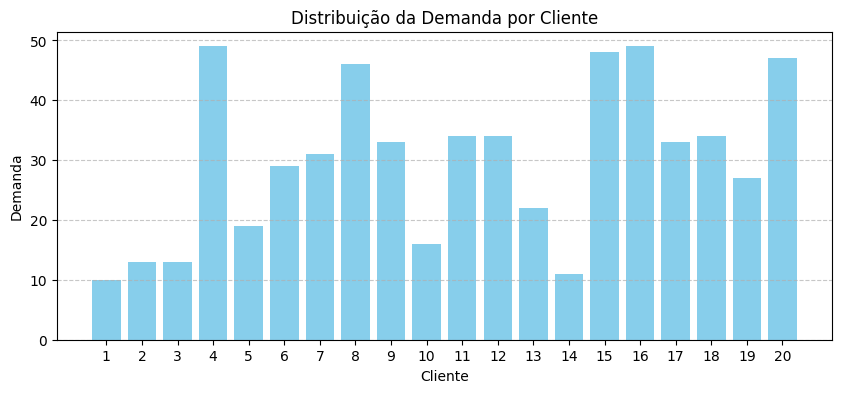

In [31]:
# gráfico distribuição da demanda por cliente
plt.figure(figsize=(10, 4))
plt.bar(dmd['Cliente'], dmd['Demanda'], color='skyblue')
plt.title('Distribuição da Demanda por Cliente')
plt.xlabel('Cliente')
plt.ylabel('Demanda')
plt.xticks(ticks=dmd['Cliente'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)


plt.show()


In [4]:
dists = pd.read_csv('distances_data.csv')

In [5]:
dists.style.background_gradient(cmap='coolwarm', subset=dists.columns[1:])


,Cliente,A,B,C,D
0,1,14,18,13,14
1,2,9,8,5,8
2,3,10,19,20,20
3,4,5,7,8,13
4,5,6,8,18,8
5,6,8,19,12,5
6,7,6,14,14,20
7,8,5,20,15,9
8,9,12,8,19,16
9,10,7,12,17,7


In [6]:
locations = pd.read_csv('locations_data_no_accents.csv')
locations

,Localizacao,Custo_Fixo,Capacidade_Maxima
0,A,50,189
1,B,40,159
2,C,70,159
3,D,60,129


In [7]:
# Conjuntos
clientes = dists.Cliente.values
locs = locations.Localizacao.values


In [8]:
clientes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [9]:
locs

array(['A', 'B', 'C', 'D'], dtype=object)

In [10]:
clientes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [11]:
# parametros

In [12]:
num_clients = clientes.size
num_clients

20

In [13]:
num_locations = locs.size
num_locations

4

In [14]:
locations

,Localizacao,Custo_Fixo,Capacidade_Maxima
0,A,50,189
1,B,40,159
2,C,70,159
3,D,60,129


In [15]:
custo_km = 1.5

In [16]:
df_custo_km = dists
df_custo_km.iloc[:,1:] = custo_km * dists.iloc[:,1:] 

In [18]:
# Criando o modelo de otimização
model = pulp.LpProblem("Facility_Location_Problem", pulp.LpMinimize)

In [19]:

# Definindo as variáveis binárias para indicar se um centro de distribuição é aberto (x_i)
x = pulp.LpVariable.dicts("Open", locs, cat='Binary')

In [20]:
x

{'A': Open_A, 'B': Open_B, 'C': Open_C, 'D': Open_D}

In [21]:
# Definindo as variáveis contínuas para a quantidade transportada de cada centro para cada cliente (y_ij)
y = pulp.LpVariable.dicts("Transport", [(i, j) for i in locs for j in range(1, num_clients + 1)], lowBound=0, cat='Continuous')

In [22]:
y

{('A', 1): Transport_('A',_1),
 ('A', 2): Transport_('A',_2),
 ('A', 3): Transport_('A',_3),
 ('A', 4): Transport_('A',_4),
 ('A', 5): Transport_('A',_5),
 ('A', 6): Transport_('A',_6),
 ('A', 7): Transport_('A',_7),
 ('A', 8): Transport_('A',_8),
 ('A', 9): Transport_('A',_9),
 ('A', 10): Transport_('A',_10),
 ('A', 11): Transport_('A',_11),
 ('A', 12): Transport_('A',_12),
 ('A', 13): Transport_('A',_13),
 ('A', 14): Transport_('A',_14),
 ('A', 15): Transport_('A',_15),
 ('A', 16): Transport_('A',_16),
 ('A', 17): Transport_('A',_17),
 ('A', 18): Transport_('A',_18),
 ('A', 19): Transport_('A',_19),
 ('A', 20): Transport_('A',_20),
 ('B', 1): Transport_('B',_1),
 ('B', 2): Transport_('B',_2),
 ('B', 3): Transport_('B',_3),
 ('B', 4): Transport_('B',_4),
 ('B', 5): Transport_('B',_5),
 ('B', 6): Transport_('B',_6),
 ('B', 7): Transport_('B',_7),
 ('B', 8): Transport_('B',_8),
 ('B', 9): Transport_('B',_9),
 ('B', 10): Transport_('B',_10),
 ('B', 11): Transport_('B',_11),
 ('B', 12): T

In [23]:
# Função objetivo: minimizar os custos fixos e os custos de transporte
model += (
    pulp.lpSum(locations.iloc[i,1] * x[locations.iloc[i,0]] for i in range(num_locations)) +
    pulp.lpSum(df_custo_km.iloc[j,i+1] * y[(locations.iloc[i,0],j+1)] for i in range(num_locations) for j in range(0, num_clients))
), "Total_Cost"

In [24]:
# Restrições:
# 1. Toda a demanda de cada cliente deve ser atendida
for j in range(0, num_clients):
    model += pulp.lpSum(y[(locations.iloc[i,0],j+1)] for i in range(num_locations)) >=  dmd.iloc[j,1], f"Demand_Constraint_Client_{j}"


In [25]:

# 2. A quantidade enviada de cada centro para todos os clientes não pode exceder a capacidade do centro
for i in range(num_locations):
    model += pulp.lpSum(y[(locations.iloc[i,0],j+1)]  for j in range(0, num_clients)) <= locations.iloc[i,2] * x[locations.iloc[i,0]] , f"Capacity_Constraint_Location_{locations.iloc[i,0]}"


In [26]:
# Resolve o modelo
status = model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/fabio/.local/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/866ac1a0deef4a7895c10a8b3cdf0a3c-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/866ac1a0deef4a7895c10a8b3cdf0a3c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 29 COLUMNS
At line 286 RHS
At line 311 BOUNDS
At line 316 ENDATA
Problem MODEL has 24 rows, 84 columns and 164 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 6621.77 - 0.00 seconds
Cgl0004I processed model has 24 rows, 84 columns (4 integer (4 of which binary)) and 164 elements
Cbc0038I Initial state - 1 integers unsatisfied sum - 0.238994
Cbc0038I Solution found of 6638.5
Cbc0038I Relaxing continuous gives 6638.5
Cbc0038I Before mini branch and bound, 3 integers at bound fixed and 57 continuous
Cbc0038I Full problem 24 rows

In [27]:
# Coleta os resultados do modelo
solution_locations = {locations.iloc[i,0]: pulp.value(x[locations.iloc[i,0]]) for i in range(num_locations)}
solution_transport = {(locations.iloc[i,0], j+1): pulp.value(y[(locations.iloc[i,0], j+1)]) for i in range(num_locations) for j in range(0, num_clients)}


In [37]:
# Monta uma matriz para a resposta
loc_resp = locations.copy()
for p in solution_locations:
    i = locations[locations.loc[:,'Localizacao'] == p].index.item()
    loc_resp.loc[i,'Funciona'] = solution_locations[p]

for u in solution_transport:
    i = locations[locations.loc[:,'Localizacao'] == u[0]].index.item()
    j = u[1]
    loc_resp.loc[i,j] = solution_transport[u]
loc_resp['pedidos'] = loc_resp.iloc[:,4:].sum(axis=1)

In [38]:
loc_resp.T

,0,1,2,3
Localizacao,A,B,C,D
Custo_Fixo,50,40,70,60
Capacidade_Maxima,189,159,159,129
Funciona,1.0,1.0,1.0,1.0
1,0.0,0.0,10.0,0.0
2,0.0,0.0,13.0,0.0
3,13.0,0.0,0.0,0.0
4,19.0,0.0,30.0,0.0
5,19.0,0.0,0.0,0.0
6,0.0,0.0,0.0,29.0
